In [1]:
import numpy as np
import pandas as pd

In [2]:
# df (data frame)
df = pd.read_csv("data_banknote_authentication.txt", delimiter=",", header=None)
display(df)

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
print(df.size)

6860


In [4]:
print(df.shape)

(1372, 5)


In [5]:
print(df.iloc[3])

0    3.4566
1    9.5228
2   -4.0112
3   -3.5944
4    0.0000
Name: 3, dtype: float64


In [6]:
Data = df.iloc[:,:4]
display(Data)

,0,1,2,3
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [7]:
Data = Data.to_numpy()
display(Data)

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [8]:
type(Data)

numpy.ndarray

In [9]:
Label = df.iloc[:,4]
display(Label)

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: 4, Length: 1372, dtype: int64

In [10]:
type(Label)

pandas.core.series.Series

In [11]:
Label = Label.to_numpy()
print(type(Label))

<class 'numpy.ndarray'>


In [12]:
display(Label)

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

# Ensure that the labels are encoded as class 1 and 2 (1 for class ‘genuine’ and 2 for class ‘fraudulent’).

In [13]:
Label = np.where(Label==0, 1, 2) 
display(Label)

array([1, 1, 1, ..., 2, 2, 2])

# Evaluate from the data and print the values of c,N and n for this data set.

In [14]:
# c is class labels
c = np.unique(Label)
print("class values (c): {}".format(c))

class values (c): [1 2]


In [15]:
# N for rows (objects) n for features (columns without label column)
N = Data.shape[0]
print("N: number of rows: {}".format(N))
n = Data.shape[1]
print("n: number of columns: {}".format(n))

N: number of rows: 1372
n: number of columns: 4


# Prepare scatterplots of the data in the space spanned by every pair of features.

In [16]:
import matplotlib.pyplot as plt

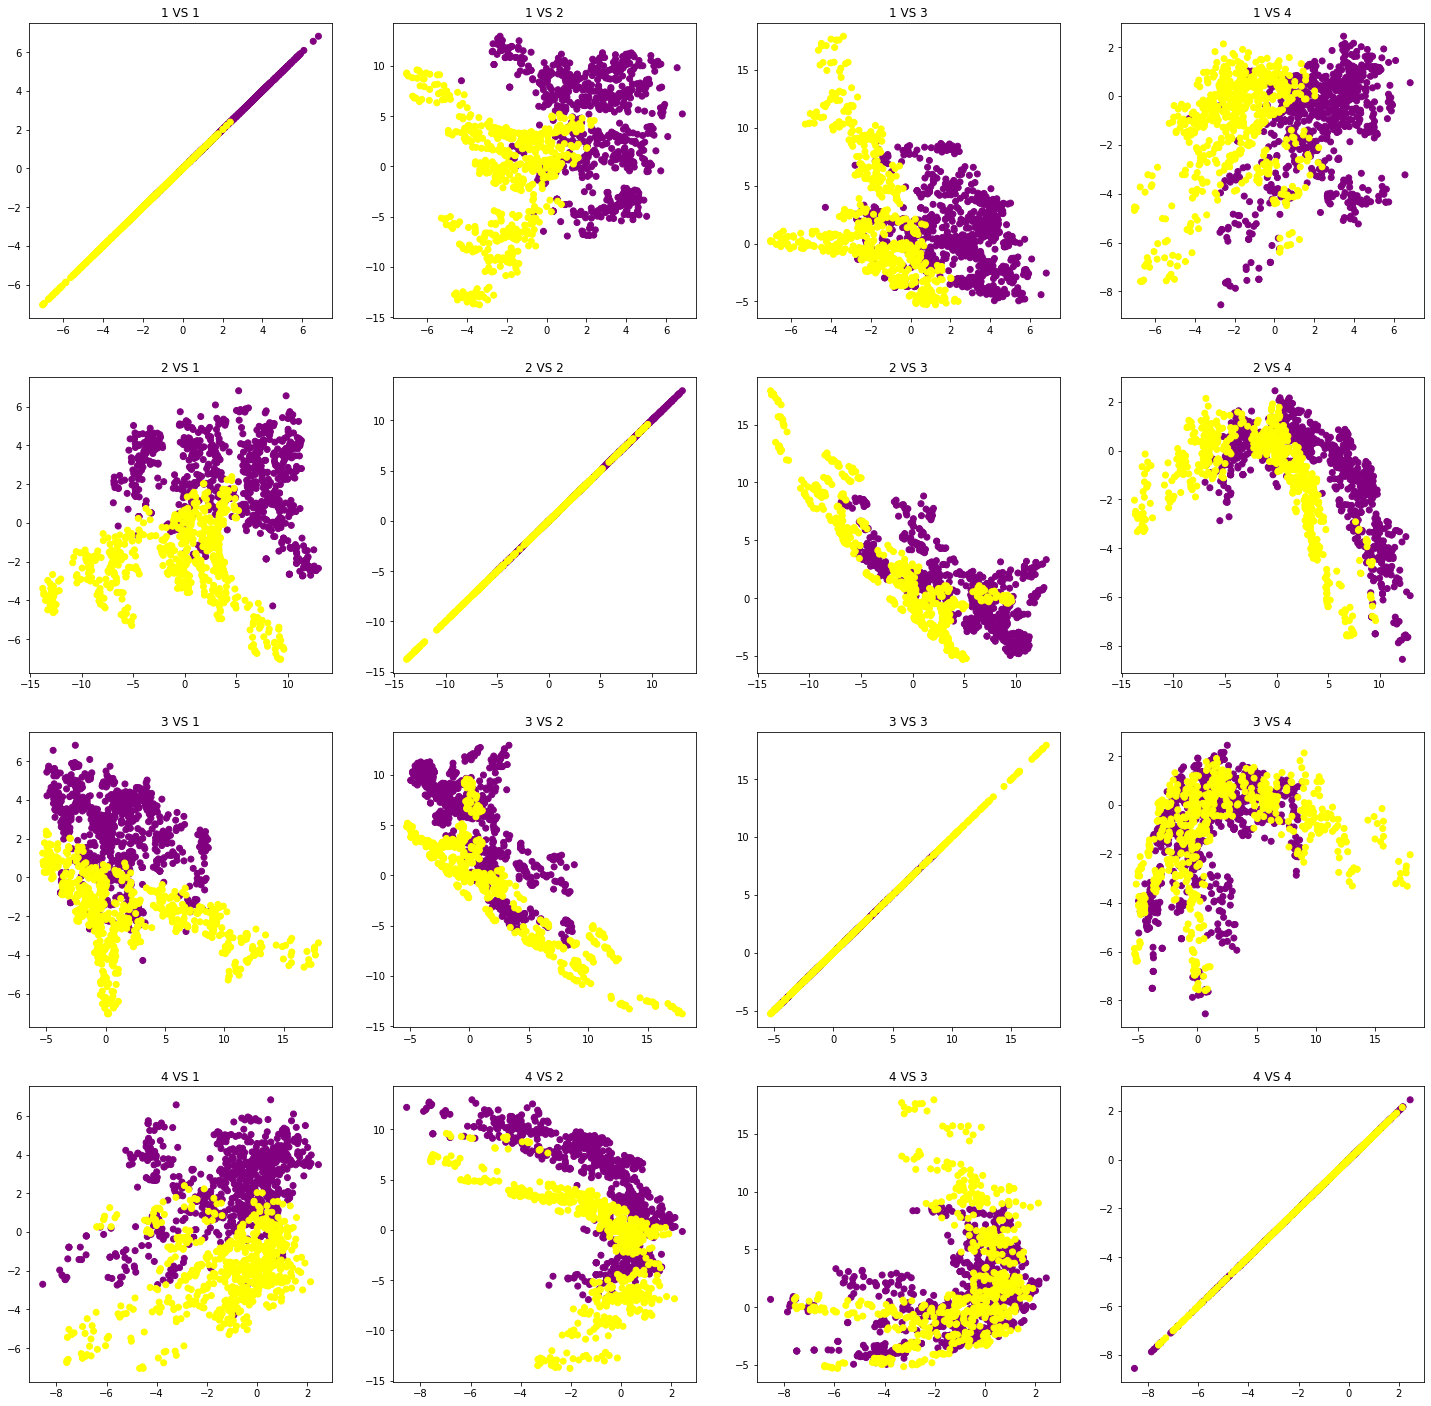

In [17]:
plt.figure(figsize=(25,25))
colormap = np.array(['purple', 'yellow'])
sn = 0
for i in range(4):
    for j in range(4):
        sn+=1
        plt.subplot(4, 4, sn)
        plt.scatter(Data[:,i], Data[:,j], c=colormap[Label-1])
        plt.title("{} VS {}".format(i+1, j+1))
plt.show()

# Consider a data set, called Data2, obtained from the original Banknote Authentication data set

In [18]:
Data2 = Data[:,[0,3]]
display(Data2)

array([[ 3.6216 , -0.44699],
       [ 4.5459 , -1.4621 ],
       [ 3.866  ,  0.10645],
       ...,
       [-3.7503 , -2.7771 ],
       [-3.5637 , -1.2823 ],
       [-2.5419 ,  1.1952 ]])

In [19]:
genuine = Data2[Label==1]
fradulent = Data2[Label==2]

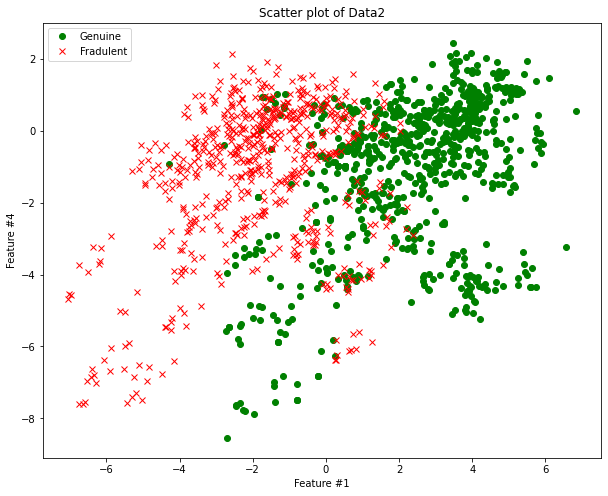

In [34]:
plt.figure(figsize=(10,8))

plt.plot(genuine[:,0], genuine[:,1], "go", label="Genuine")
plt.plot(fradulent[:,0], fradulent[:,1], "rx", label="Fradulent")
plt.xlabel("Feature #1")
plt.ylabel("Feature #4")
plt.title("Scatter plot of Data2")
plt.legend(loc="upper left")
plt.show()

In [49]:
def line(x, w=0, b=0):
    y=w*x+b  #y=mx+c
    return  y

def mean_squared_error(y_true, y_pred):
    s=(y_true-y_pred)**2
    return s.mean()

In [64]:
(-5*1.5)-2

-9.5

In [65]:
(5*1.5)-2

5.5

In [43]:
X=np.concatenate((genuine[:,0].ravel(), fradulent[:0].ravel()))
y_true = np.concatenate((genuine[:,1].ravel(), fradulent[:1].ravel()))

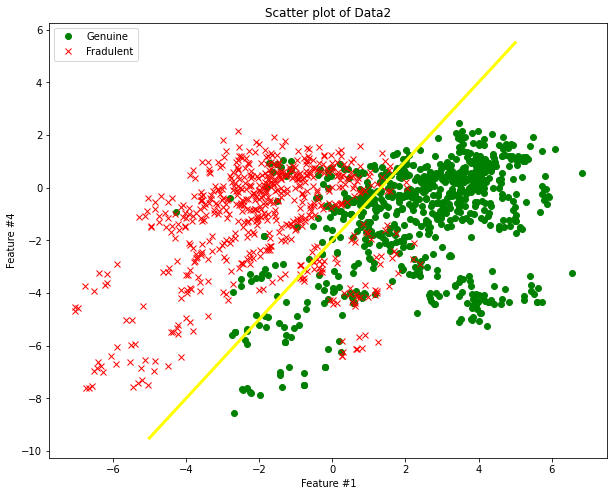

In [66]:
plt.figure(figsize=(10,8))


plt.plot(genuine[:,0], genuine[:,1], "go", label="Genuine")
plt.plot(fradulent[:,0], fradulent[:,1], "rx", label="Fradulent")
plt.plot([-5, 5], [-9.5, 5.5], "yellow", linewidth=3)
plt.xlabel("Feature #1")
plt.ylabel("Feature #4")
plt.title("Scatter plot of Data2")
plt.legend(loc="upper left")
plt.show()

In [ ]:
plt.figure(figsize=(10,8))

plt.plot(genuine[:,0], genuine[:,1], "go", label="Genuine")
plt.plot(fradulent[:,0], fradulent[:,1], "rx", label="Fradulent")
plt.plot( "yellow", linewidth=3)
plt.xlabel("Feature #1")
plt.ylabel("Feature #4")
plt.title("Scatter plot of Data2")
plt.legend(loc="upper left")
plt.show()